# Initialisation

In [3]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cst

from matplotlib.figure import Figure
from time import time

from plot_tools import *
from PN_tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Mikkola's method

Solve Kepler's equation $l = e\sinh{u} - u$

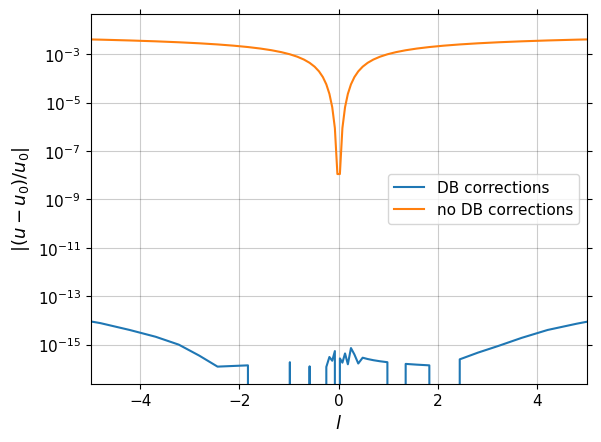

In [2]:
%matplotlib inline

e = 1.5

u_0 = np.linspace(-50,50,1000)
l = e*np.sinh(u_0) - u_0

u_mikk_DB = mikkola(e,l)
u_mikk = mikkola(e,l,False)

create_plot(r'$l$',r'$|(u-u_0)/u_0|$',[-5,5], logy=True)

plt.plot(l,np.abs((u_mikk_DB-u_0)/u_0),label='DB corrections')
plt.plot(l,np.abs((u_mikk-u_0)/u_0),label='no DB corrections')

plt.legend()
plt.show()

# 2.5PN spinning compact binaries in hyperbolic motion

## Initial conditions

In [2]:
# BH properties ==================================

m1, m2 = 20., 15.# BH masses in solar masses
m = m1 + m2
mu = m1*m2/m
eta = mu/m

chi1, chi2 = 1, 1 # BH spins
S1, S2 = m1*chi1/(m2), m2*chi2/(m1)

# Initial conditions ================================

b, et0 = 70, 1.1
phi0 = 0
theta10, theta20 = 0.5, 0.8
phi10, phi20 = 0.35, 1

n0 = (np.sqrt(et0**2 - 1)/(b + np.sqrt(et0**2 - 1) * ((eta - 1)/(eta**2 - 1) + (7*eta - 6)/6)))**(3/2)

title = r'$b='+str(b)+r'GM/c^2$'+', '+r'$e_t='+str(et0)+r'$'

## Solve orbit

In [3]:
%matplotlib inline

t0 = 0.
t = np.linspace(-1500, 1500, 1000)

radiation_reaction = True
num_checks = False

# non-spinning ==============

y0 = b, et0, phi0

r1PN, phi1PN, n_vec1PN, k_vec1PN, xi_vec1PN, s1_1PN, s2_1PN, dr1PN, v1PN = spinning_orbit_2_5PN(t, t0, eta, 0., 0., y0, PN=2, spinning=False, radiation_reaction=radiation_reaction, num_checks=num_checks)
r2PN, phi2PN, n_vec2PN, k_vec2PN, xi_vec2PN, s1_2PN, s2_2PN, dr2PN, v2PN = spinning_orbit_2_5PN(t, t0, eta, 0., 0., y0, PN=4, spinning=False, radiation_reaction=radiation_reaction, num_checks=num_checks)

# spinning ==================

s10 = np.array([np.sin(theta10)*np.cos(phi10), np.sin(theta10)*np.sin(phi10), np.cos(theta10)])
s20 = np.array([np.sin(theta20)*np.cos(phi20), np.sin(theta20)*np.sin(phi20), np.cos(theta20)])
S1, S2 = m1*chi1/m2, m2*chi2/m1
kx0 = -n0**(1/3)*(S1*s10[0] + S2*s20[0])/np.sqrt(et0**2-1)
ky0 = -n0**(1/3)*(S1*s10[1] + S2*s20[1])/np.sqrt(et0**2-1)
kz0 = np.sqrt(1- kx0**2 - ky0**2)
k0 = np.array([kx0, ky0, kz0])

y0 = b, et0, kx0, ky0, kz0, s10[0], s10[1], s10[2], s20[0], s20[1], s20[2], phi0

r1_5PN, phi1_5PN, n_vec1_5PN, k_vec1_5PN, xi_vec1_5PN, s1_1_5PN, s2_1_5PN, dr1_5PN, v1_5PN = spinning_orbit_2_5PN(t, t0, eta, S1, S2, y0, PN=3, spinning=True, radiation_reaction=radiation_reaction, num_checks=num_checks)
r2_5PN, phi2_5PN, n_vec2_5PN, k_vec2_5PN, xi_vec2_5PN, s1_2_5PN, s2_2_5PN, dr2_5PN, v2_5PN = spinning_orbit_2_5PN(t, t0, eta, S1, S2, y0, PN=5, spinning=True, radiation_reaction=radiation_reaction, num_checks=num_checks)


Computing orbit at 1.0PN ========================

Solving differential system...
Getting system parameters...
Find motion of the orbital basis...
Computing derivatives...
Done !

Computing orbit at 2.0PN ========================

Solving differential system...
Getting system parameters...
Find motion of the orbital basis...
Computing derivatives...
Done !

Computing orbit at 1.5PN ========================

Solving differential system...
Getting system parameters...
Find motion of the orbital basis...
Computing derivatives...
Done !

Computing orbit at 2.5PN ========================

Solving differential system...
Getting system parameters...
Find motion of the orbital basis...
Computing derivatives...
Done !



## Plot orbit

In [4]:
%matplotlib qt

X1PN, Y1PN, Z1PN = r1PN*n_vec1PN[0], r1PN*n_vec1PN[1], r1PN*n_vec1PN[2]
X2PN, Y2PN, Z2PN = r2PN*n_vec2PN[0], r2PN*n_vec2PN[1], r2PN*n_vec2PN[2]
X1_5PN, Y1_5PN, Z1_5PN = r1_5PN*n_vec1_5PN[0], r1_5PN*n_vec1_5PN[1], r1_5PN*n_vec1_5PN[2]
X2_5PN, Y2_5PN, Z2_5PN = r2_5PN*n_vec2_5PN[0], r2_5PN*n_vec2_5PN[1], r2_5PN*n_vec2_5PN[2]

# Plot spinning orbit ========================================

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(X1_5PN, Y1_5PN, Z1_5PN, color = 'b', label='1.5PN')
ax.plot(X2_5PN, Y2_5PN, Z2_5PN, color = 'r', label='2.5PN')

#ax.plot(X1PN, Y1PN, Z1PN, color = 'orange', label='1PN')
#ax.plot(X2PN, Y2PN, Z2PN, color = 'black', label='2PN')

ax.set_zlim([-50,50])

ax.set_xlabel('$x (GM/c^2)$')
ax.set_ylabel('$y (GM/c^2)$')
ax.set_zlabel('$z (GM/c^2)$')

#ax.set_aspect('equal')

plt.title('Spinning')
plt.legend()

plt.savefig('Report/Plots/Spinning_orbit.pdf')
plt.show()

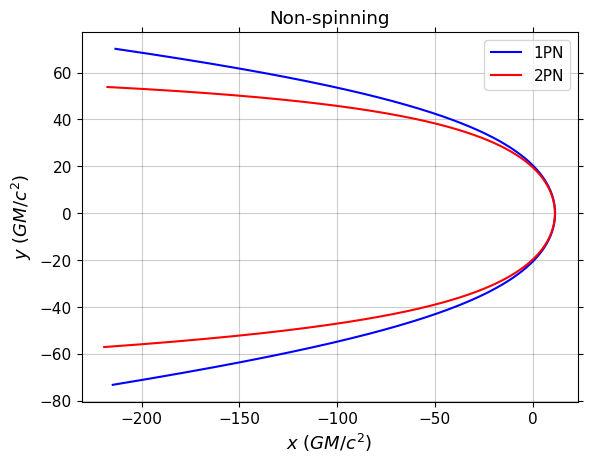

In [7]:
%matplotlib inline

# Plot non-spinning orbit ========================================

create_plot(r'$x$ $(GM/c^2)$',r'$y$ $(GM/c^2)$', title='Non-spinning')

plt.plot(X1PN, Y1PN, color = 'b', label='1PN')
plt.plot(X2PN, Y2PN, color = 'r', label='2PN')

plt.legend()

plt.savefig('Report/Plots/Non_spinning_orbit.pdf')
plt.show()

## Precession

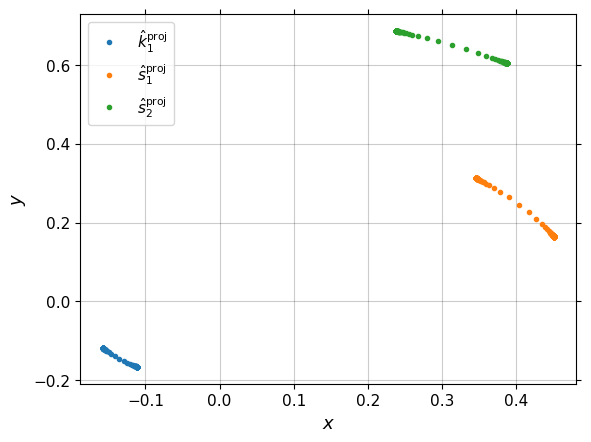

In [8]:
# precession ===============================

%matplotlib inline

step = 5

create_plot(r'$x$', r'$y$')

plt.plot(k_vec2_5PN[0][::step], k_vec2_5PN[1][::step], '.', label=r'$\hat{k}_1^\mathrm{proj}$')
plt.plot(s1_2_5PN[0][::step], s1_2_5PN[1][::step], '.', label=r'$\hat{s}_1^\mathrm{proj}$')
plt.plot(s2_2_5PN[0][::step], s2_2_5PN[1][::step], '.', label=r'$\hat{s}_2^\mathrm{proj}$')

plt.legend()

plt.savefig('Report/Plots/precession.pdf')
plt.show()

## Individual motion at 1PN

In [9]:
# individual motion at 1PN

%matplotlib qt

m = m1 + m2
V2 = dot(v1PN, v1PN)

x1 = (mu/m1 + mu*(m1 - m2)/(2*m**2)*(V2 - 1/r1PN))*r1PN*np.cos(phi1PN)
y1 = (mu/m1 + mu*(m1 - m2)/(2*m**2)*(V2 - 1/r1PN))*r1PN*np.sin(phi1PN)

x2 = (-mu/m2 + mu*(m1 - m2)/(2*m**2)*(V2 - 1/r1PN))*r1PN*np.cos(phi1PN)
y2 = (-mu/m2 + mu*(m1 - m2)/(2*m**2)*(V2 - 1/r1PN))*r1PN*np.sin(phi1PN)

create_plot(r'$x$ $(GM/c^2)$',r'$y$ $(GM/c^2)$')

plt.plot(x1, y1, label='1')
plt.plot(x2, y2, label='2')

plt.show()

## ADM to Harmonic coordinates

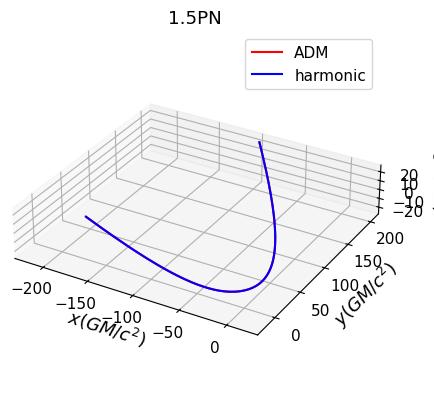

In [10]:
# Spinning

r_harm1_5PN, dr_harm1_5PN, n_harm1_5PN, v_harm1_5PN = ADM2harmonic(r1_5PN, dr1_5PN, n_vec1_5PN, v1_5PN, s1_1_5PN, s2_1_5PN, S1, S2, eta, PN=3)
r_harm2_5PN, dr_harm2_5PN, n_harm2_5PN, v_harm2_5PN = ADM2harmonic(r2_5PN, dr2_5PN, n_vec2_5PN, v2_5PN, s1_2_5PN, s2_2_5PN, S1, S2, eta, PN=5)

X_harm1_5PN, Y_harm1_5PN, Z_harm1_5PN = r_harm1_5PN*n_harm1_5PN[0], r_harm1_5PN*n_harm1_5PN[1], r_harm1_5PN*n_harm1_5PN[2]
X_harm2_5PN, Y_harm2_5PN, Z_harm2_5PN = r_harm2_5PN*n_harm2_5PN[0], r_harm2_5PN*n_harm2_5PN[1], r_harm2_5PN*n_harm2_5PN[2]


%matplotlib inline

# Plot orbit ========================================

step = 10

ax = plt.figure().add_subplot(projection='3d')

ax.plot(X1_5PN, Y1_5PN, Z1_5PN, color = 'r', label='ADM')
ax.plot(X_harm1_5PN, Y_harm1_5PN, Z_harm1_5PN, color = 'b', label='harmonic')


ax.set_xlabel('$x (GM/c^2)$')
ax.set_ylabel('$y (GM/c^2)$')
ax.set_zlabel('$z (GM/c^2)$')

ax.set_aspect('equal')
plt.title('1.5PN')
plt.legend()
plt.show()

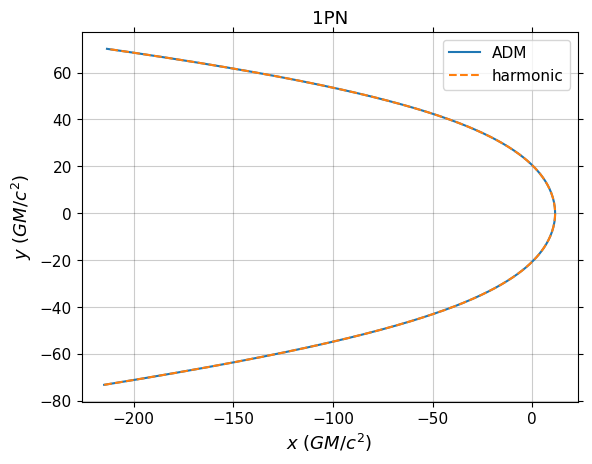

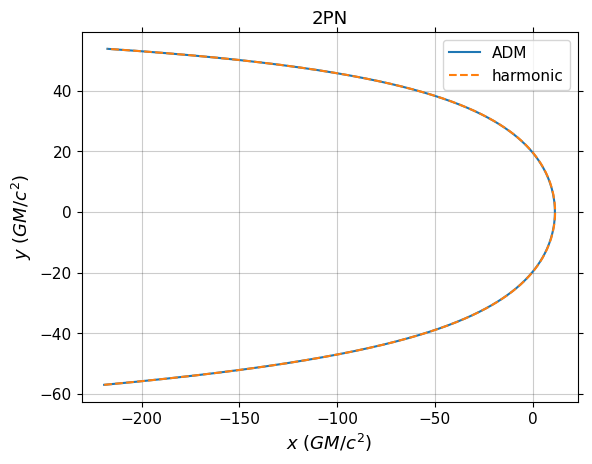

In [11]:
r_harm1PN, dr_harm1PN, n_harm1PN, v_harm1PN = ADM2harmonic(r1PN, dr1PN, n_vec1PN, v1PN, s1_1PN, s2_1PN, S1, S2, eta, PN=2)
r_harm2PN, dr_harm2PN, n_harm2PN, v_harm2PN = ADM2harmonic(r2PN, dr2PN, n_vec2PN, v2PN, s1_2PN, s2_2PN, S1, S2, eta, PN=4)

X_harm1PN, Y_harm1PN, Z_harm1PN = r_harm1PN*n_harm1PN[0], r_harm1PN*n_harm1PN[1], r_harm1PN*n_harm1PN[2]
X_harm2PN, Y_harm2PN, Z_harm2PN = r_harm2PN*n_harm2PN[0], r_harm2PN*n_harm2PN[1], r_harm2PN*n_harm2PN[2]

%matplotlib inline

create_plot(r'$x$ $(GM/c^2)$',r'$y$ $(GM/c^2)$', title='1PN')

plt.plot(X1PN, Y1PN, label='ADM')
plt.plot(X_harm1PN, Y_harm1PN, '--', label='harmonic')

plt.legend()
plt.show()

create_plot(r'$x$ $(GM/c^2)$',r'$y$ $(GM/c^2)$', title='2PN')

plt.plot(X2PN, Y2PN, label='ADM')
plt.plot(X_harm2PN, Y_harm2PN, '--', label='harmonic')

plt.legend()
plt.show()

## GW emission

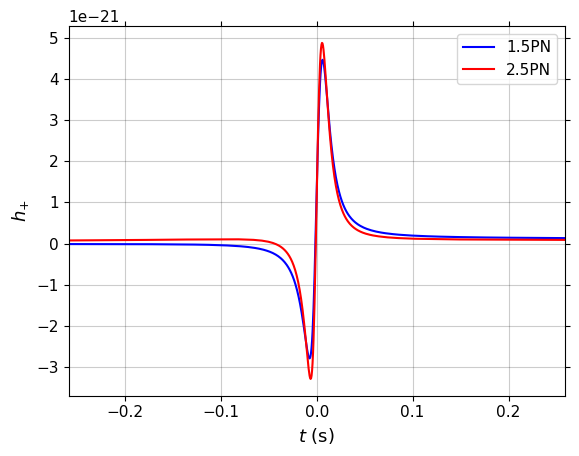

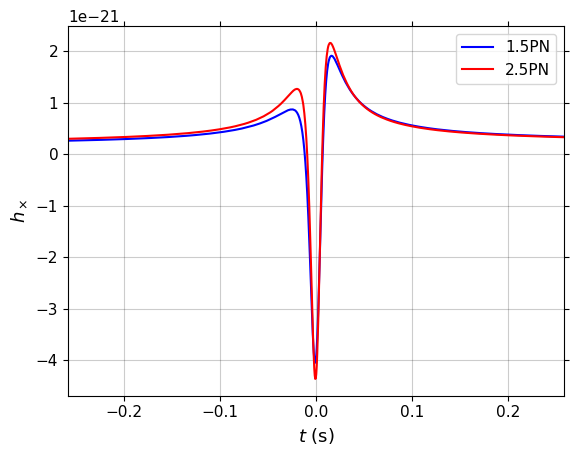

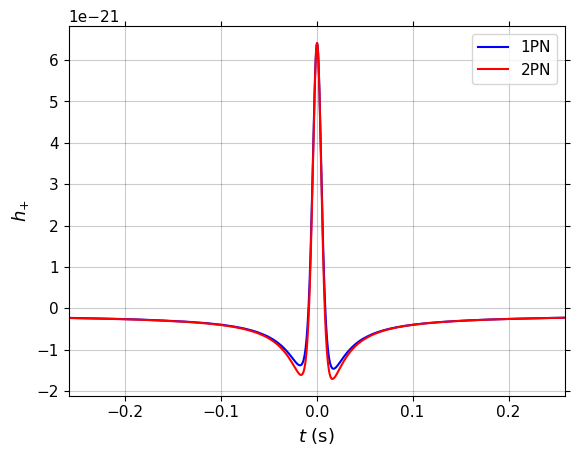

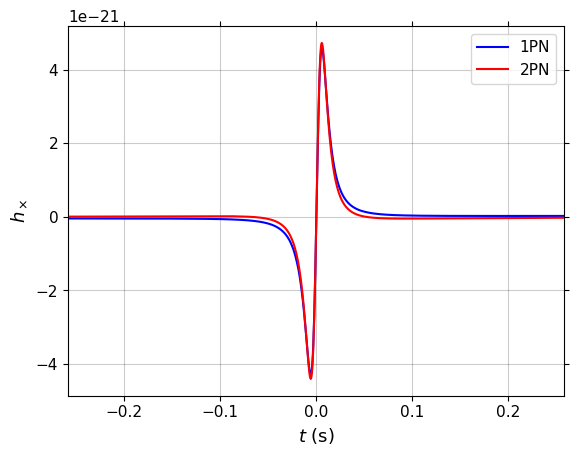

In [13]:
Theta = np.pi/4
R = 20*u.Mpc

prefac = (cst.G*mu*u.M_sun/(cst.c**2*R)).to(u.dimensionless_unscaled)

hplus1PN, hcross1PN = GW_emission_from_orbit(Theta, R, t, n_harm1PN, v_harm1PN, r_harm1PN, dr_harm1PN, s1_1PN, s2_1PN, m1, m2, chi1, chi2, GW_order = 4)
hplus2PN, hcross2PN = GW_emission_from_orbit(Theta, R, t, n_harm2PN, v_harm2PN, r_harm2PN, dr_harm2PN, s1_2PN, s2_2PN, m1, m2, chi1, chi2, GW_order = 4)
hplus1_5PN, hcross1_5PN = GW_emission_from_orbit(Theta, R, t, n_harm1_5PN, v_harm1_5PN, r_harm1_5PN, dr_harm1_5PN, s1_1_5PN, s2_1_5PN, m1, m2, chi1, chi2, GW_order = 4)
hplus2_5PN, hcross2_5PN = GW_emission_from_orbit(Theta, R, t, n_harm2_5PN, v_harm2_5PN, r_harm2_5PN, dr_harm2_5PN, s1_2_5PN, s2_2_5PN, m1, m2, chi1, chi2, GW_order = 4)

%matplotlib inline

tau = (cst.G*m*u.M_sun*t/cst.c**3).to(u.s) # real time, t without dim

create_plot(r'$t$ (s)', r'$h_\plus$', [tau[0].value,tau[-1].value])

plt.plot(tau, prefac*hplus1_5PN, '-', color='b', label=r'1.5PN')
plt.plot(tau, prefac*hplus2_5PN, '-', color='r', label=r'2.5PN')

plt.legend()

create_plot(r'$t$ (s)', r'$h_\times$', [tau[0].value,tau[-1].value])

plt.plot(tau, prefac*hcross1_5PN, '-', color='b', label=r'1.5PN')
plt.plot(tau, prefac*hcross2_5PN, '-', color='r', label=r'2.5PN')

plt.legend()

create_plot(r'$t$ (s)', r'$h_\plus$', [tau[0].value,tau[-1].value])

plt.plot(tau, prefac*hplus1PN, '-', color='b', label=r'1PN')
plt.plot(tau, prefac*hplus2PN, '-', color='r', label=r'2PN')

plt.legend()

create_plot(r'$t$ (s)', r'$h_\times$', [tau[0].value,tau[-1].value])

plt.plot(tau, prefac*hcross1PN, '-', color='b', label=r'1PN')
plt.plot(tau, prefac*hcross2PN, '-', color='r', label=r'2PN')

plt.legend()


plt.show() 

## Numerical checks

/home/mathieu/Documents/HEP/Master_thesis/Codes/PN_tools.py:1507: SyntaxWarning: invalid escape sequence '\d'
  """


Computing orbit at 2.5PN ========================

Solving differential system...
Getting system parameters...
Find motion of the orbital basis...
Computing derivatives...
Done !



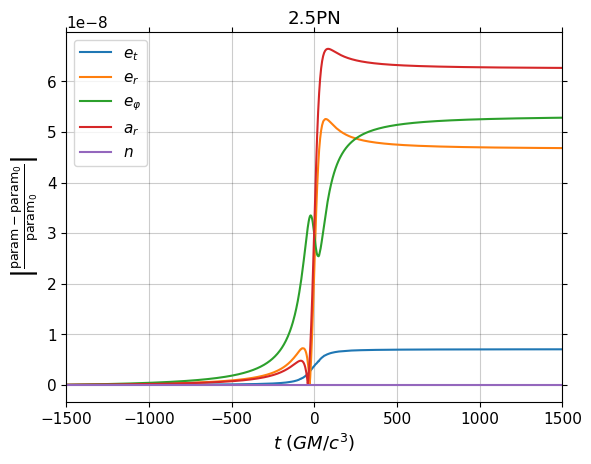

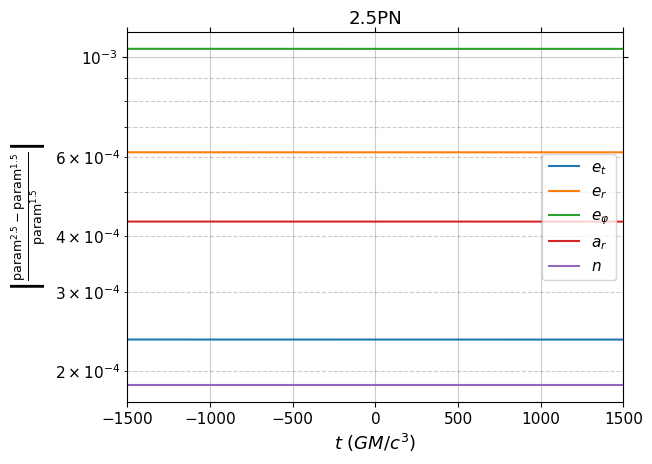

In [5]:
# BH properties ==================================

m1, m2 = 20., 15.# BH masses in solar masses
m = m1 + m2
mu = m1*m2/m
eta = mu/m

chi1, chi2 = 1, 1 # BH spins
S1, S2 = m1*chi1/(m2), m2*chi2/(m1)

# Initial conditions ================================

b, et0 = 70, 1.1
phi0 = 0
theta10, theta20 = 0.5, 0.8
phi10, phi20 = 0.35, 1

n0 = (np.sqrt(et0**2 - 1)/(b + np.sqrt(et0**2 - 1) * ((eta - 1)/(eta**2 - 1) + (7*eta - 6)/6)))**(3/2)

title = r'$b='+str(b)+r'GM/c^2$'+', '+r'$e_t='+str(et0)+r'$'

%matplotlib inline

t0 = 0.
t = np.linspace(-1500, 1500, 1000)

radiation_reaction = False


# spinning ==================

s10 = np.array([np.sin(theta10)*np.cos(phi10), np.sin(theta10)*np.sin(phi10), np.cos(theta10)])
s20 = np.array([np.sin(theta20)*np.cos(phi20), np.sin(theta20)*np.sin(phi20), np.cos(theta20)])
S1, S2 = m1*chi1/m2, m2*chi2/m1
kx0 = -n0**(1/3)*(S1*s10[0] + S2*s20[0])/np.sqrt(et0**2-1)
ky0 = -n0**(1/3)*(S1*s10[1] + S2*s20[1])/np.sqrt(et0**2-1)
kz0 = np.sqrt(1- kx0**2 - ky0**2)
k0 = np.array([kx0, ky0, kz0])

y0 = b, et0, kx0, ky0, kz0, s10[0], s10[1], s10[2], s20[0], s20[1], s20[2], phi0

#r1_5PN, phi1_5PN, n_vec1_5PN, k_vec1_5PN, xi_vec1_5PN, s1_1_5PN, s2_1_5PN, dr1_5PN, v1_5PN = spinning_orbit_2_5PN(t, t0, eta, S1, S2, y0, PN=3, spinning=True, radiation_reaction=radiation_reaction, num_checks=True, analytic_E_L=True)
r2_5PN, phi2_5PN, n_vec2_5PN, k_vec2_5PN, xi_vec2_5PN, s1_2_5PN, s2_2_5PN, dr2_5PN, v2_5PN = spinning_orbit_2_5PN(t, t0, eta, S1, S2, y0, PN=5, spinning=True, radiation_reaction=radiation_reaction, num_checks=True)

# Validity of PN

## Vary orbital parameters

In [14]:
m1, m2 = 10., 30.# BH masses in solar masses
m = m1 + m2
mu = m1*m2/m
eta = mu/m

b, et0 = np.linspace(30, 100, 50), np.linspace(1.1, 2, 50)
phi0 = 0

%matplotlib inline

t0 = 0.
t = np.linspace(-50, 50, 1000)

radiation_reaction = False

V = np.zeros((len(b), len(et0)))

# non-spinning ==============

for i in tqdm(range(len(b))) :
    for j in range(len(et0)) :

        y0 = b[i], et0[j], phi0
        r, phi, n_vec, k_vec, xi_vec, s1, s2, dr, v = spinning_orbit_2_5PN(t, t0, eta, 0., 0., y0, PN=4, spinning=False, radiation_reaction=radiation_reaction, verbose=False)
        V[i,j] = np.sqrt(np.max(dot(v, v)))

  0%|          | 0/50 [00:00<?, ?it/s]

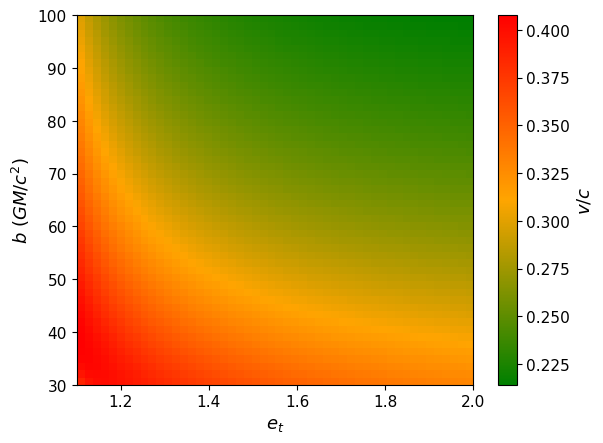

In [17]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["g", "orange", "r"], N=256) 

plt.colorbar(plt.imshow(V, origin='lower', cmap=cmap, aspect='auto', extent=[et0[0], et0[-1], b[0], b[-1]]), label=r'$v/c$')


plt.xlabel(r'$e_t$')
plt.ylabel(r'$b$ $(GM/c^2)$')

plt.savefig('Report/Plots/PN_validity.pdf')
plt.show()

## Vary masses

In [113]:
m1, m2 = np.linspace(1, 100, 50), np.linspace(1, 100, 50)# BH masses in solar masses
m = m1 + m2
mu = m1*m2/m
eta = mu/m

b, et0 = 100, 1.5
phi0 = 0

%matplotlib inline

t0 = 0.
t = np.linspace(-50, 50, 1000)

radiation_reaction = False

V_2 = np.zeros((len(m1), len(m2)))

# non-spinning ==============

for i in range(len(m1)) :
    for j in range(len(m2)) :

        eta = m1[i]*m2[j]/(m1[i]+m2[j])**2
        y0 = b, et0, phi0
        r, phi, n_vec, k_vec, xi_vec, s1, s2, dr, v = spinning_orbit_2_5PN(t, t0, eta, 0., 0., y0, PN=4, spinning=False, radiation_reaction=radiation_reaction, verbose=False)
        V_2[i,j] = np.sqrt(np.max(dot(v, v)))

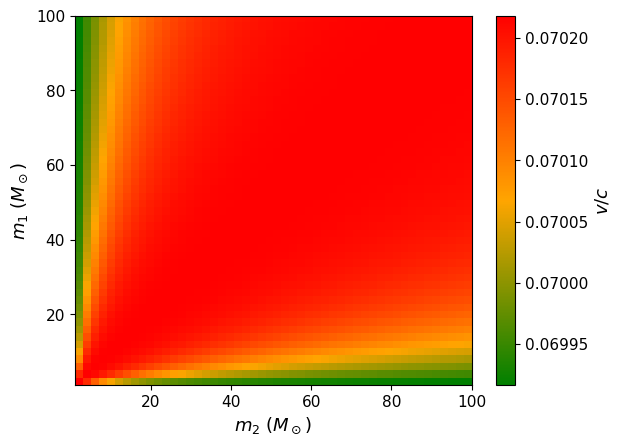

In [114]:
plt.colorbar(plt.imshow(V_2, origin='lower', cmap=cmap, aspect='auto', extent=[m2[0], m2[-1], m1[0], m1[-1]]), label=r'$v/c$')


plt.xlabel(r'$m_2$ $(M_\odot$)')
plt.ylabel(r'$m_1$ $(M_\odot$)')
plt.show()

## Vary mass ratio

In [127]:
q = m1/m2

m1 = 100
q = np.logspace(-3, 3, 50)
m2 = m1/q

V_3 = np.zeros(len(q))

b, et0 = 50, 1.4
phi0 = 0

t0 = 0.
t = np.linspace(-50, 50, 1000)

for i in tqdm(range(len(q))) :

    eta = m1*m2[i]/(m1+m2[i])**2
    y0 = b, et0, phi0
    r, phi, n_vec, k_vec, xi_vec, s1, s2, dr, v = spinning_orbit_2_5PN(t, t0, eta, 0., 0., y0, PN=4, spinning=False,radiation_reaction=radiation_reaction, verbose=False)        
    V_3[i] = np.sqrt(np.max(dot(v, v)))
    

  0%|          | 0/50 [00:00<?, ?it/s]

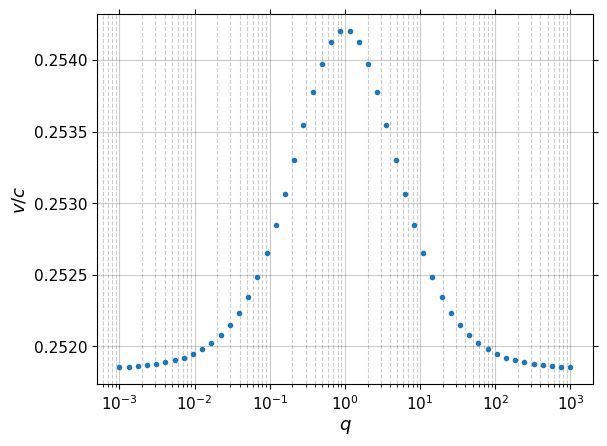

In [128]:
%matplotlib inline

create_plot(r'$q$', r'$v/c$')

plt.plot(q, V_3, '.')

plt.xscale('log')

plt.show()